In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mmctools.coupling.terrain import SRTM

# Example: SRTM download and projection to UTM
Following approach outlined in http://geologyandpython.com/dem-processing.html

In [4]:
# region to clip from the digital elevation model (DEM)
bounds = west, south, east, north = (-90, 46, -88, 47)  # Iron River, MI
dx = dy = 250.  # output grid resolution
product = 'SRTM3' # SRTM1 | SRTM3 (30- and 90-m DEM)
srtm_output = '/Users/equon/Downloads/output.tif'

In [5]:
srtm = SRTM(bounds,fpath=srtm_output,product=product)

In [6]:
%time srtm.download()

CPU times: user 3.59 ms, sys: 12.4 ms, total: 15.9 ms
Wall time: 4.47 s


In [7]:
x,y,z = srtm.to_terrain(dx,dy)

EPSG code: 32616


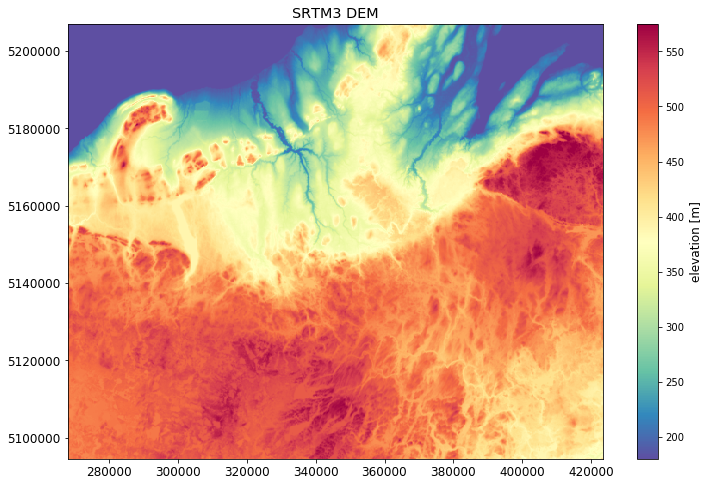

In [8]:
vmin,vmax = 180,575
xmin, xmax, ymin, ymax = 268000.0, 423500.0, 5094500.0, 5207000.0

fig,ax = plt.subplots(figsize=(12,8))
cm = ax.pcolormesh(x,y,z, cmap='Spectral_r',vmin=vmin,vmax=vmax)
cb = fig.colorbar(cm,ax=ax)
cb.set_label('elevation [m]',fontsize='large')
ax.tick_params(labelsize='large')
ax.set_title('{:s} DEM'.format(product), fontsize='x-large')
ax.set_xlim((xmin,xmax))
ax.set_ylim((ymin,ymax))
fig.savefig('SRTM_example.png')